今週は教師あり学習の例として、ペンギンの種類を分類する問題を扱います。機械学習モデルの構築を行う前に対象のデータについて理解を深めることは重要です。まずはデータの読み込みから可視化までの処理を通して、データの中身を確認していきましょう。

必要なライブラリをインポートします。ここでは次のライブラリを使用します。

- seaborn: データの可視化
- matplotlib: データの可視化
- pandas: データフレームへの操作


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## ペンギンデータ

機械学習による分類問題の例として、南極大陸に生育するペンギンの体長についての観測データを利用します。このデータを使ってペンギンの種類を分類するモデルを構築します。

### データの読み込み

ペンギンデータは`seaborn`ライブラリに含まれています。データを利用するには`load_dataset()`関数で読み込みます。


In [2]:
# ペンギンデータの読み込み
penguins = sns.load_dataset("penguins")

# pandasのDataFrameとして格納されている
# type(penguins)

### データの確認

ペンギンデータの中身を確認します。データについて理解を深めるためのいくつかの処理を行ってみましょう。まずはデータフレームオブジェクトの属性の一つ、`shape`を使うと、行数と列数を確認できます。


In [3]:
penguins.shape

# 以下のコードの実行はエラーとなる
# 理由はshapeがデータフレームの属性であるのに対して、
# shape()はメソッド（関数）であるため
# penguins.shepe()

(344, 7)

以下の例では、いくつかのpandasのデータフレーム関数を使って、データの概要を確認しています。これらは関数として実行するため、末尾に括弧を付けています。


In [4]:
# データフレームの概要
# 各列（変数）の名前（Column）、欠損値の件数（Non-Null Count）、データ型(Dtype)を表示
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


いくつの変数に欠損値があるようです。欠損値の有無は機械学習モデルを実行する際に影響を及ぼす可能性があります。ここでは欠損値への処理を行いませんが、ペンギンデータに欠損値が含まれるということを覚えておきましょう。

つづいて具体的なデータの中身を確認します。`head()`関数を使うと、データの先頭から引数で指定した行数を表示できます。`tail()`関数はデータの末尾から指定した行数を表示するのに利用します。


In [5]:
# 先頭5行の表示
penguins.head(5)

# 末尾3行の表示
# penguins.tail(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


ここでペンギンデータの変数をまとめておきましょう。このデータには次の変数が含まれます。

- `species`: ペンギンの種名。次の3種が含まれます。Adelie（アデリーペンギン）、Chinstrap（ヒゲペンギン）、Gentoo（ジェンツーペンギン）。
- `island`: ペンギンが生息する島の名前。次の3つの島が含まれます。Biscoe、Dream、Torgersen。
- `bill_length_mm`: くちばしの長さ（単位: mm）。
- `bill_depth_mm`: くちばしの深さ（単位: mm）。くちばしの高さとも言えます。
- `flipper_length_mm`: 翼の長さ（単位: mm）。ペンギンの場合はひれの長さとも言えます。
- `body_mass_g`: 体重（単位: g）。
- `sex`: 性別。Male（オス）、Female（メス）の2種類。

分類対象として扱うペンギンの種名について、詳しく調べます。次のコードでそれぞれの種名のデータが何件含まれるかを確認します。


In [6]:
print("ペンギンの種類: ", penguins["species"].unique())

penguins.groupby("species").size().reset_index(name="count")

ペンギンの種類:  ['Adelie' 'Chinstrap' 'Gentoo']


,species,count
0,Adelie,152
1,Chinstrap,68
2,Gentoo,124


::: {layout-ncol=3}
![アデリーペンギン](../img/Pygoscelis_adeliae_adelie.png)

![ヒゲペンギン](../img/Pygoscelis_antarctica_chinstrap.png)

![ジェンツーペンギン](../img/Pygoscelis_papua_gentoo.png)
:::

### 統計量

pandasの`describe()`関数を使うと、平均値や標準偏差、最小値・最大値といった複数の統計量を一度に確認できます。


In [7]:
# ペンギンデータの統計量の表示
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


`describe()`関数が対象とするのはデータフレームの数値データです。`species`や`island`のような文字列データは対象となりません。理由は文字列データは平均値（`mean`）や標準偏差（`std`）などの統計量に意味がないためです[^1]。しかし最頻値（`top`）や最頻値の出現回数（`freq`）は計算できます。`describe()`関数のデフォルトでは数値データのみが対象となりますが、引数で`include="all"`を指定することで文字列データも対象となります。

[^1]: 文字列データは数値データとは異なるため、算術平均を計算することはできません。そのため、平均値や標準偏差などの統計量の出力は`NaN`(Not a Number)として表示されます。一方で数値データは文字列データとは異なり、最頻値を計算することはできません。そのため、最頻値の出力は`NaN`として表示されます。


In [8]:
# 文字列の変数も含めた統計量の表示
penguins.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


#### 相関係数

次にペンギンデータの変数間の相関関係を`corr()`関数で確認します。相関係数は数値データに対してのみ計算されるため、カテゴリ変数である`species`や`island`は除外しておきます。さらに、相関係数は欠損値がある場合、適切な値を計算できないため、欠損値を含む行を削除しておきます。


In [9]:
# 欠損値を含む行を削除
penguins_mod = penguins.dropna()

# カテゴリ変数を含まないデータフレームを作成
penguins_numeric = penguins_mod.drop(columns=["species", "island", "sex"])

# 相関係数の計算
correlation_matrix = penguins_numeric.corr()

# 相関係数の表示
correlation_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


相関係数は0から1の間の値となり、絶対値が大きいほど強い相関関係があることを示します。そのため自分自身との相関係数は1となります。符号が正のとき、2つの変数は正の相関関係にあります。つまり、片方の変数が増加すると、もう片方の変数も増加する傾向にあることを示します。一方符号が負のとき、2つの変数は負の相関関係にあります。これは片方の変数が増加すると、もう片方の変数は減少する傾向にあることを意味します。

### データの可視化

さらにデータへの理解を深めるために、グラフ上にペンギンデータを表現してみます。データ可視化によって、細かな傾向や全体的な特徴を発見することにつながる可能性があります。

#### 散布図


/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/py

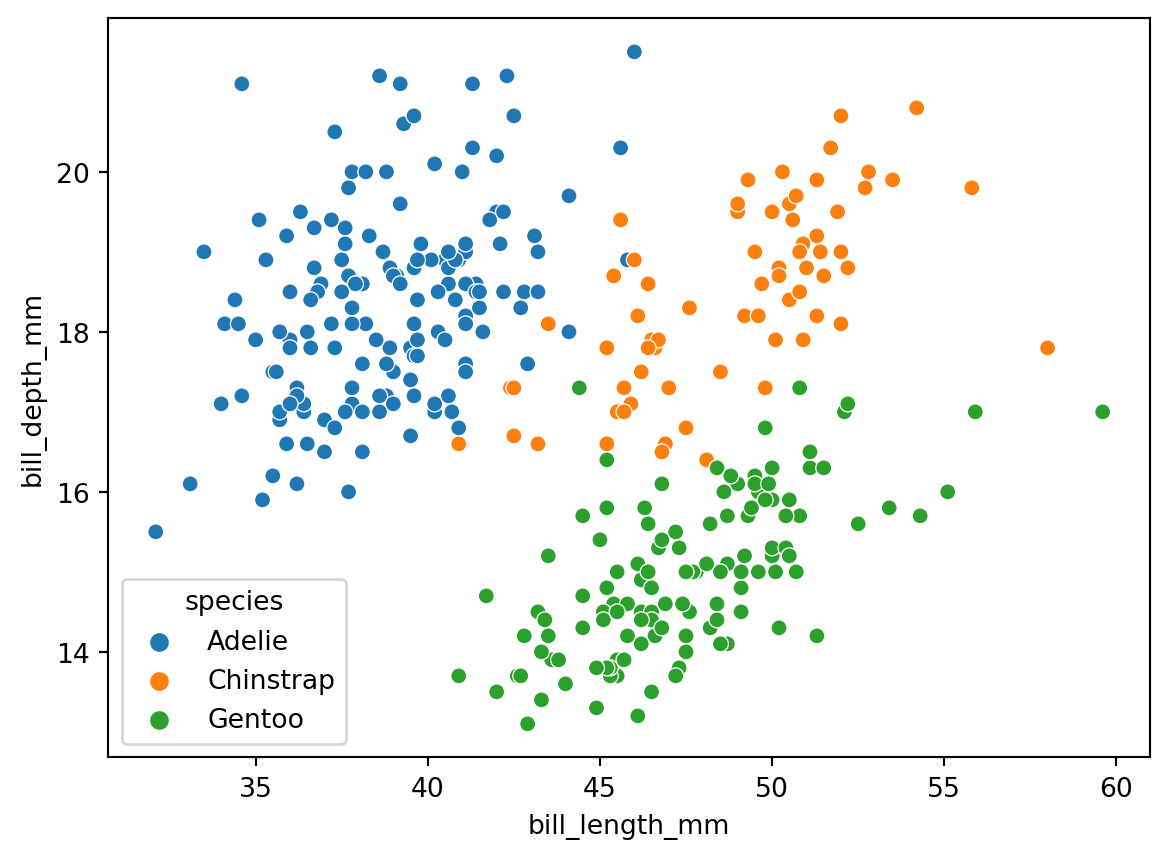

In [10]:
# seabornを使った散布図の作成
sns.scatterplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    # 塗り分けの変数の指定
    hue="species",
)
plt.show()

複数の変数の組み合わせについて散布図を作成するには、seabornの`pairplot()`関数を利用します。


/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/py

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/suryu/Documents/course/exeai/.venv/li

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/py

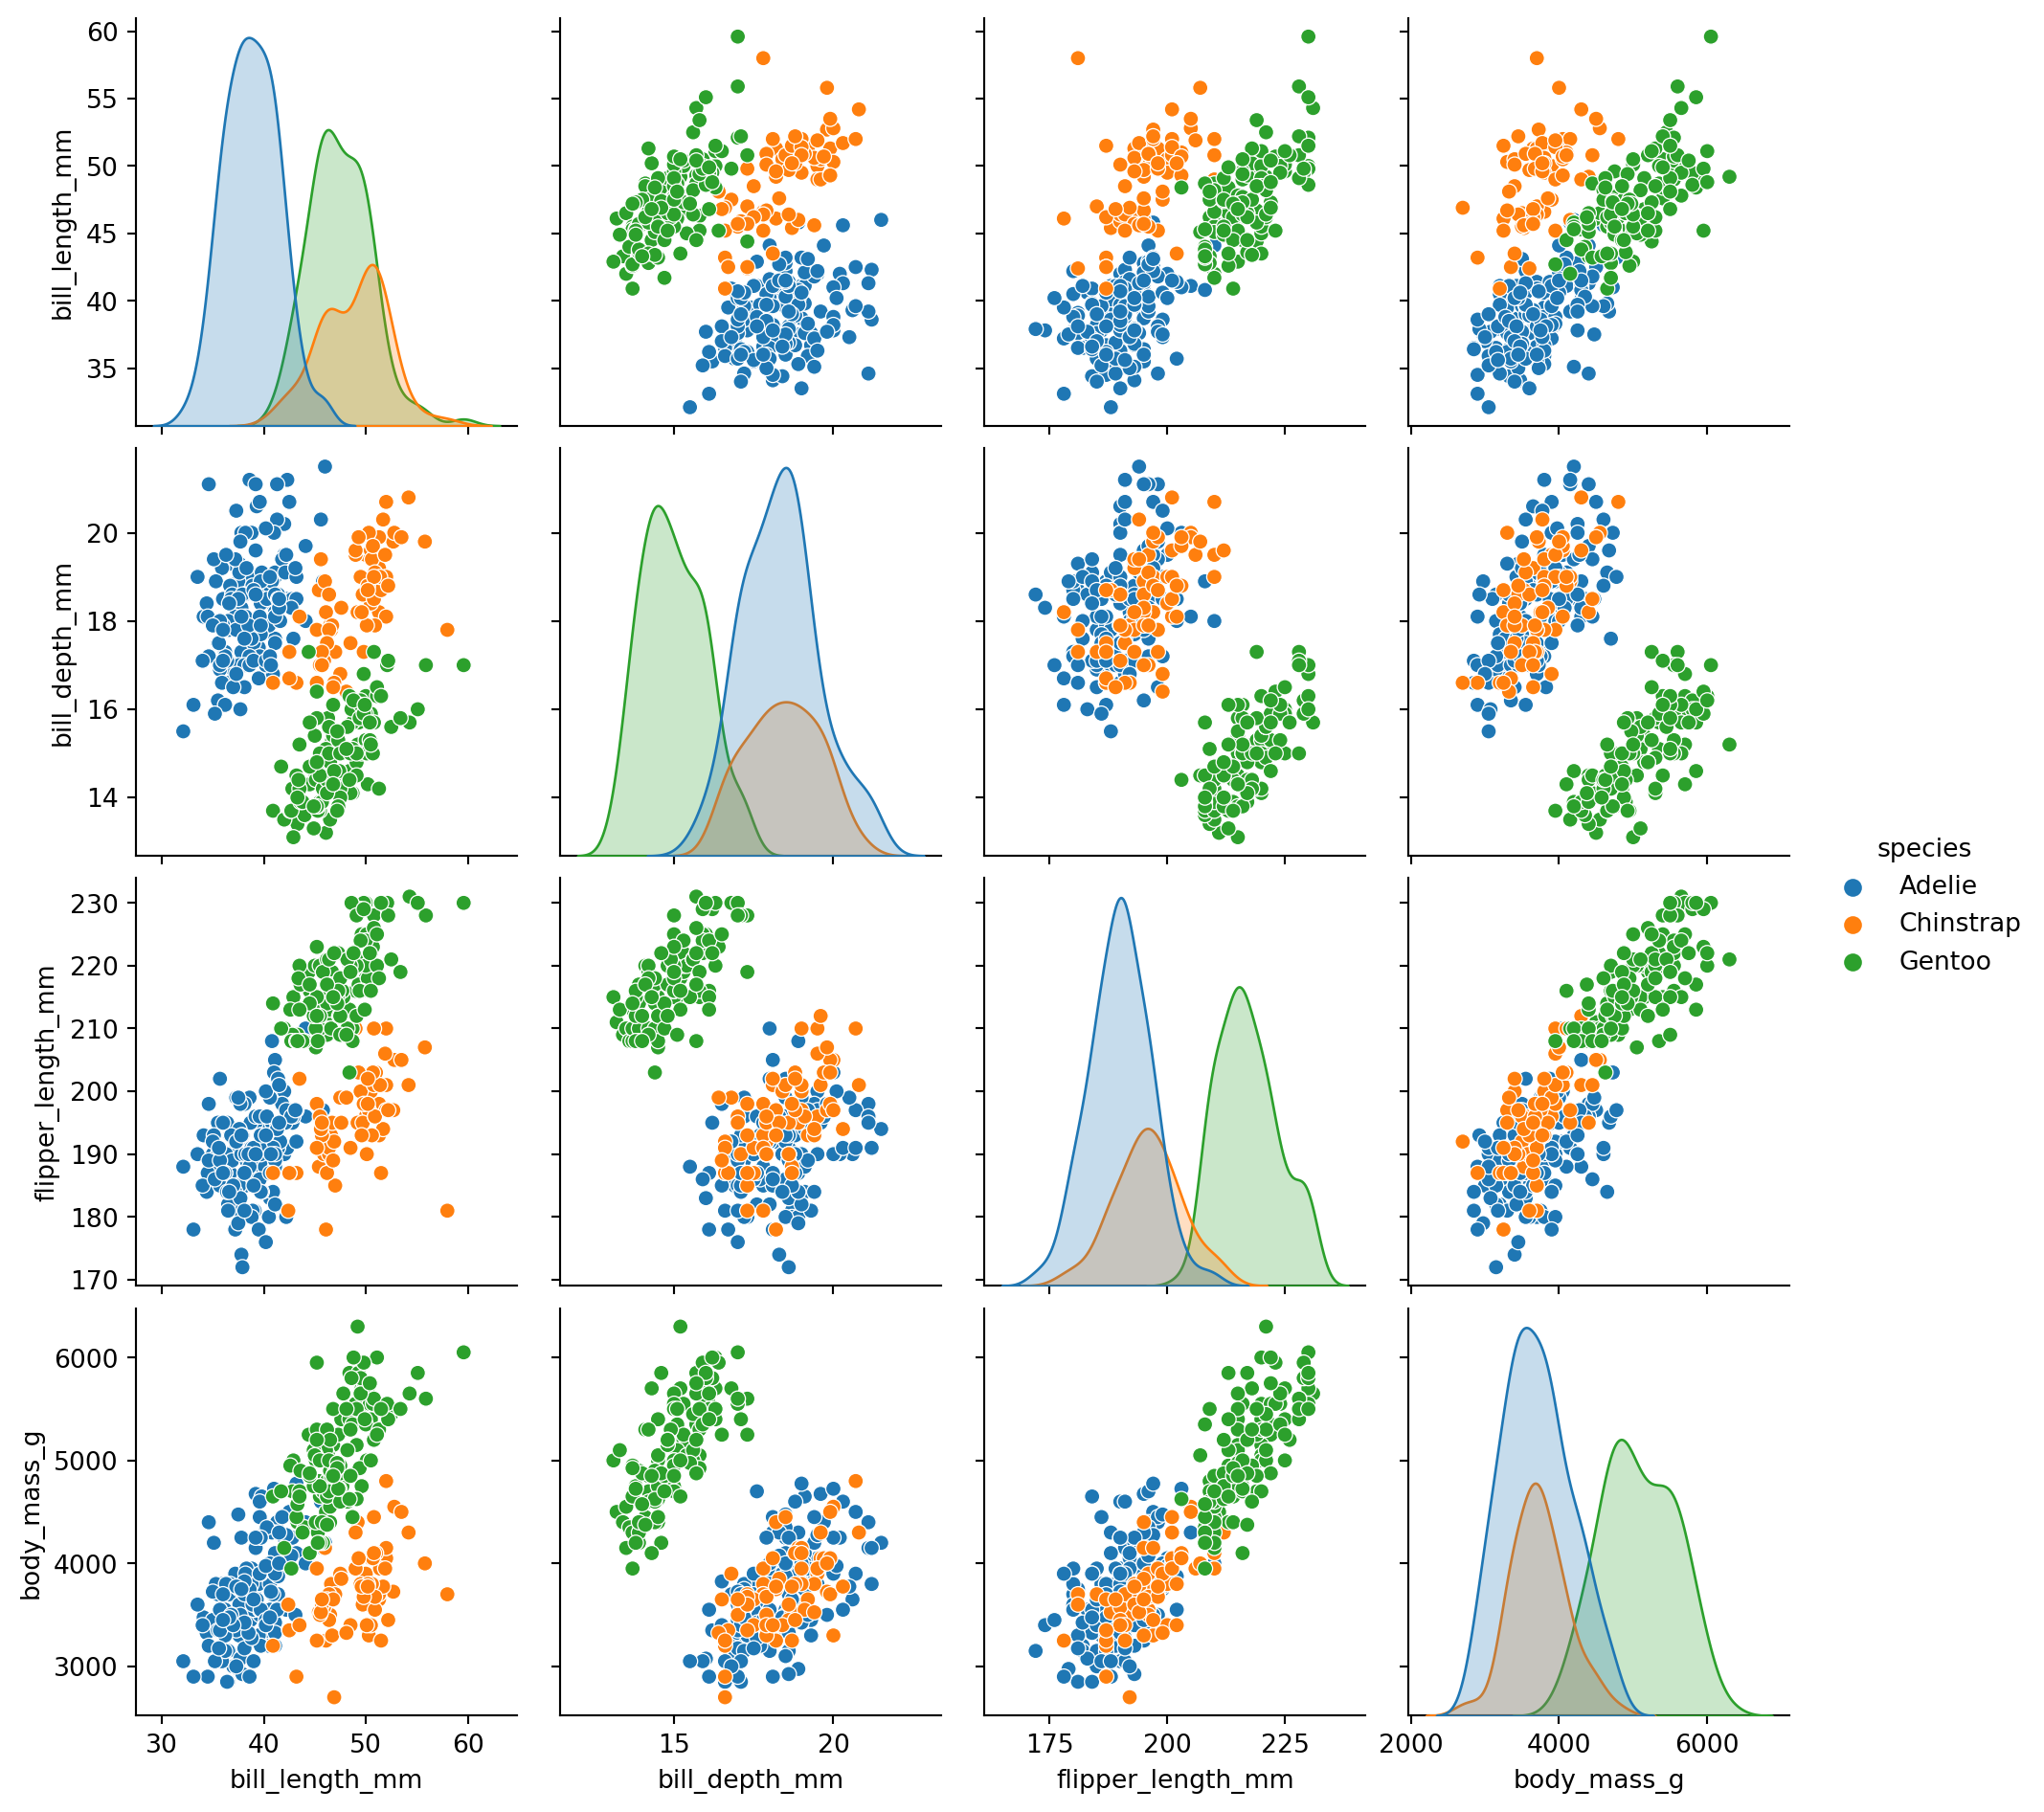

In [11]:
sns.pairplot(penguins, hue="species")
plt.show()

`pairplot()`関数はデータフレームの数値データの組み合わせについて散布図を作成します。`body_mass_g`と`body_mass_g`のように、自分自身との組み合わせについてはヒストグラムを描画します。`pairplot()`の出力のような変数の組み合わせに対応する散布図とヒストグラムなどをひとまとめにしたものを散布図行列と呼びます。

#### 箱ひげ図

ペンギンデータの数値変数の分布を箱ひげ図を用いて確認します。箱ひげ図はseabornの`boxplot()`関数を使って作成します。


/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/suryu/Documents/course/exeai/.venv/lib/py

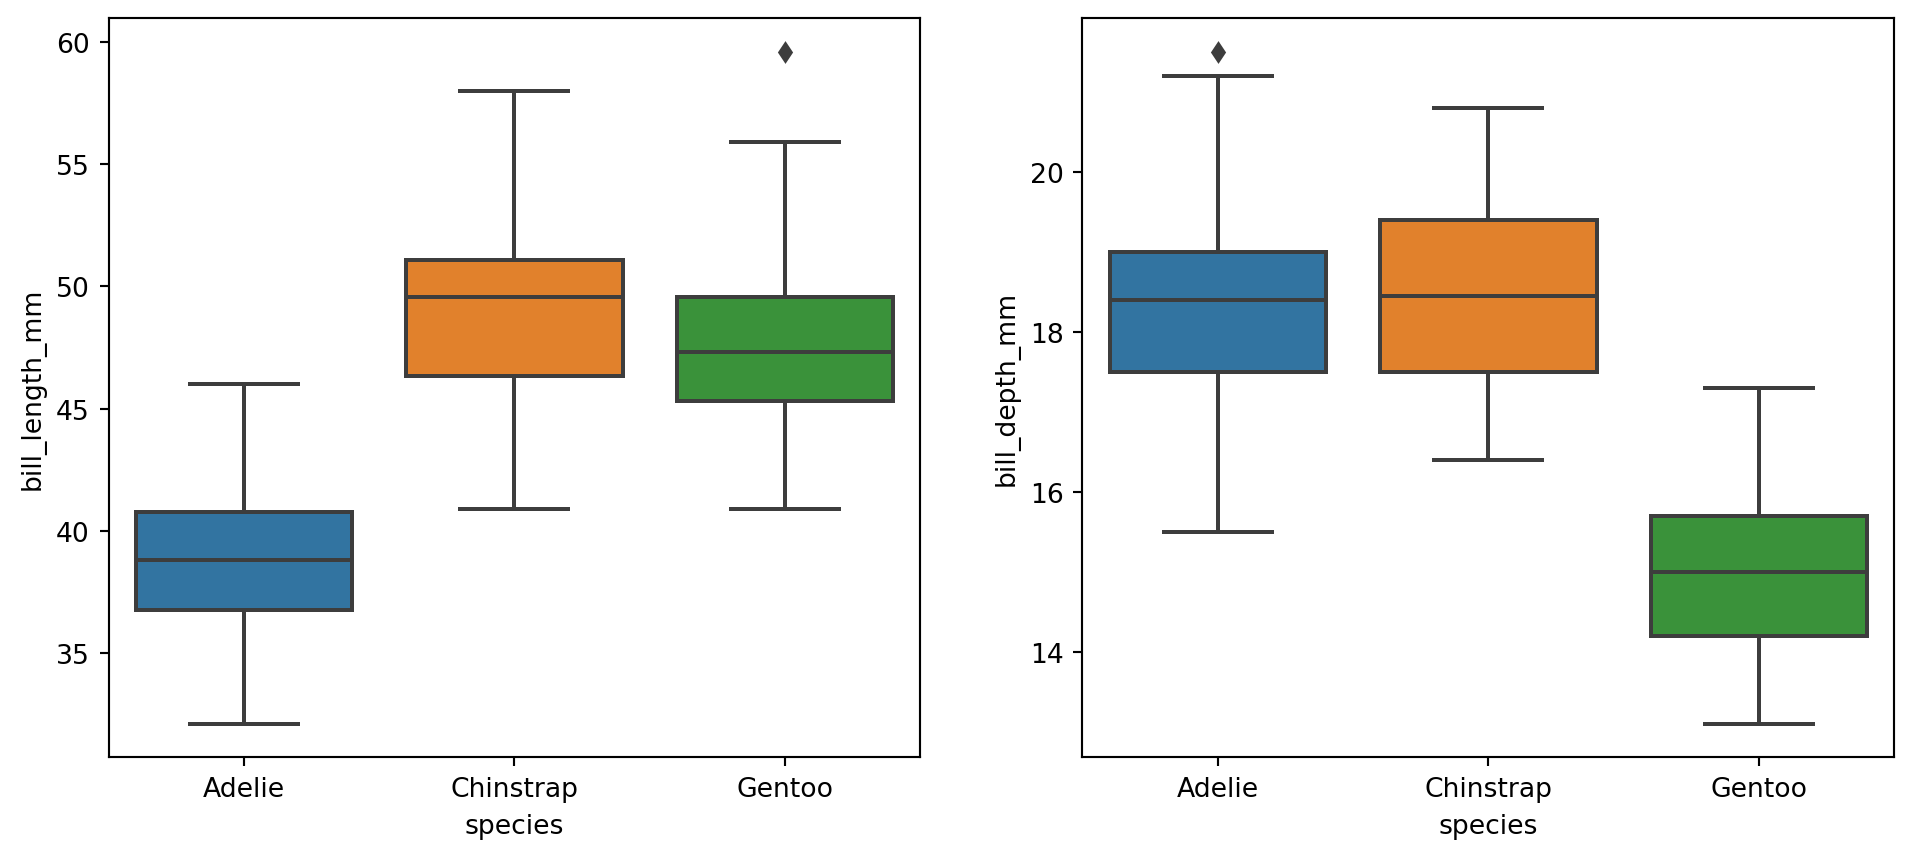

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x="species", y="bill_length_mm", data=penguins, ax=axes[0])
sns.boxplot(x="species", y="bill_depth_mm", data=penguins, ax=axes[1])
plt.show()

::: {.callout-note}
- 同様に`flipper_length_mm`と`body_mass_g`についても箱ひげ図を作成しましょう。

- ここで示した散布図、箱ひげ図のほかのデータ可視化方法を調べて実行してみましょう。
:::